In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def show_img(filename):
    img = mpimg.imread(filename)
    plt.figure(figsize=(12, 12))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

[стандарт Office Open XML File Formats с. 28-62; 167-1301](http://www.ecma-international.org/publications/files/ECMA-ST/ECMA-376,%20Fifth%20Edition,%20Part%201%20-%20Fundamentals%20And%20Markup%20Language%20Reference.zip)

## Структура docx

docx — это zip архив который физически содержит 2 типа файлов:

* xml файлы с расширениями xml и rels
* медиа файлы (изображения и т.п.)

Логически — 3 вида элементов:

* Типы (Content Types) — список типов медиа файлов (например png) встречающихся в документе и типов частей документов (например документ, верхний колонтитул)

* Части (Parts) — отдельные части документа (например document.xml, footer1.xml, header1.xml, comments.xml, endnotes.xml), сюда входят как xml документы так и медиа файлы

* Связи (Relationships) идентифицируют части документа для ссылок (например связь между разделом документа и колонтитулом), а также тут определены внешние части (например гиперссылки)

docx, созданный с помощью текстового редактора имеет несколько дополнительных файлов.

* docProps/core.xml — основные метаданные документа согласно Open Packaging Conventions и Dublin Core

* docProps/app.xml — общая информация о документе: количество страниц, слов, символов, название приложения в котором был создан документ и т.п

* word/settings.xml — настройки относящиеся к текущему документу

* word/styles.xml — стили применимые к документу. Отделяют данные от представления

* word/webSettings.xml — настройки отображения HTML частей документа и настройки того, как конвертировать документ в HTML

* word/fontTable.xml — список шрифтов используемых в документе

* word/theme1.xml — тема (состоит из цветовой схемы, шрифтов и форматирования)

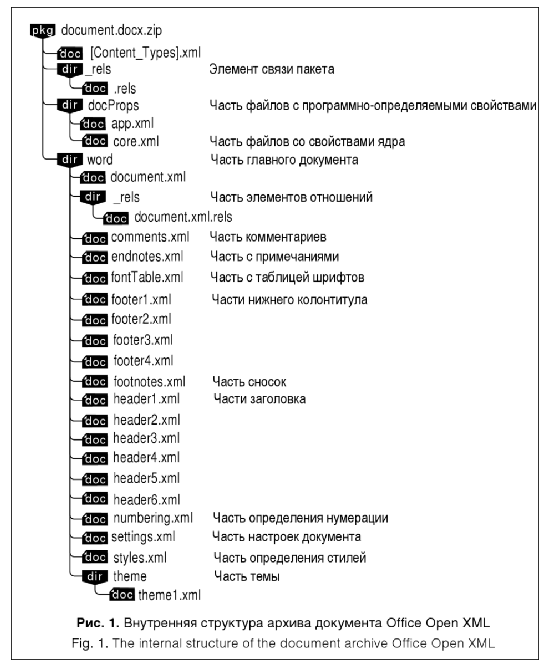

In [3]:
show_img('examples/namelist.png')

## Документация для word/document.xml

1) document

2) body

3) p - paragrath - основная форма хранения текста, параграфы разделяются символом новой строки
  
pPr - свойства параграфа (например, выравнивание и отступ) (применяются независимо от стилей)

4) r - raw - элемент, составляющий текстовый регион с набором общих свойств (работает на уровне символов)

rPr - свойства элемента

5) в документах могут встречаться секции (sectPr - section properties) - наборы параграфов с общими свойствами

цифры в свойствах - двадцатые пункта

1440 двадцатых пункта = 1 дюйм

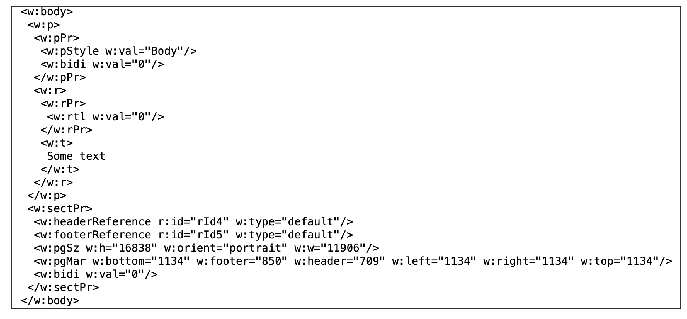

In [4]:
show_img('examples/document_example.png')

### Свойства параграфа

* pBdr - граница параграфа (top, left, bottom, right)

* bidi - направление текста справа налево

* framePr - для параграфов в рамке

* ind - отступ (опускается, если сохраняются предыдущие настройки)

  * start - (0 по умолчанию) - отступ для начала параграфа (startChars в символах)

  * end (0 по умолчанию) - отступ для конца параграфа (endChars в символах)

  * firstLine - отступ для первой строки (относительно отступа в данном параграфе)

  * hanging - отступ влево для первой строки (относительно отступа в данном параграфе)

* js - выравнивание (ST_Jc - все значения)

  * center - по центру

  * right - по правому краю

* numPr - параграф является элементом нумерованного или маркированного списка

  * ilvl - уровень вложенности списка (вложенность в другие списки) начинается с нуля

  * numId - номер для данного списка (каждому списку нулевого уровня присваивается уникальный идентификатор)

* outlineLvl - уровень вложенности данного параграфа в документе (может быть не всегда, нужен для оглавления), значения 0-9, по умолчанию 9 (нет уровней вложенности в документе)

* pStyle - стиль параграфа (ST_String)

  * val (default, heading) - значение связано со styleId

* shd (shading) - фоновый цвет параграфа

* spacing - расстояние между параграфами и строками в параграфе (если опущено, то применяются предыдущие настройки)

  * after - расстояние после параграфа (ST_TwipsMeasure)
  
  * afterLines - расстояние после последней строки параграфа (указывается в 1/100 строк) 
  
  * before - расстояние перед параграфом (ST_TwipsMeasure)
  
  * beforeLines (аналогично afterLines)
  
  * line - число вертикальных пробелов между строками в параграфе, это число может быть в разных единицах измерения в зависимости от значания атрибута lineRule
  

если указаны разные значения в настройках соседних параграфов, выбирается наибольшее

* tabs - список табуляций для данного параграфа

* textAlignment - вертикальное выравнивание текста в строках параграфа


### Свойства элемента

* toggle properties - page 615

* b (bold) - жирный шрифт (page 264)

* bdr - граница текстового элемента

* caps - отображать все буквы заглавными

* color - цвет текста

* effect - эффект анимации для текста

* emboss - рельефный текст

* highlight - цвет фона текстового элемента

* i (italic) - курсив

* imprint - еще один эффект для текста

* kerning - расстояние между символами в шрифте

* lang - язык

* pgNum - нумерация страницы

* rFonts - список шрифтов для элемента

* rStyle - стиль элемента

* характеристики элемента рассматриваются "справа налево"

* shd (shading) - фоновый цвет элемента

* spacing - сколько добавить "дополнительных пробелов" между символами в тексте

* sz - размер шрифта

* t - текст элемента, отображающийся в документе

* u (underline) - подчеркивание

* w - сжатие / расширение текста

### Сводка по bold

1. Может быть <w:b val='1'/> либо val='0', то есть явное указание значения, есть жирность или нет

2. Может быть ситуация <b/>, то есть без указания значения

    * Если <b/> встречается и в параграфе, и в элементе, то весь параграф жирный
    
    * Если <b/> встречается в отдельных элементах, то жирные только они
    
Аналогичная ситуация с курсивом

3. В стилях <b/> может также встречаться в свойствах элементов, тогда шрифт считается жирным

## Numbering

в файле word/numberings.xml содержится информация обо всех типах списков, используемых в документе и их настройках

* abstractNum - описание свойств конкретного типа списка, этому типу присваивается номер (abstractNumId), который используется в word/document.xml

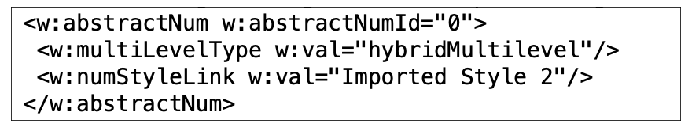

In [6]:
show_img('examples/numbering_example.png')

## Headers and footers

сам текст находится в отдельных файлах (например word/header1.xml, word/footer1.xml) 

* hdr - содержимое header (аналогично содержимому body для документа)

* ftr - содержимое footer (аналогично содержимому body для документа)

в файле word/document.xml находятся ссылки в свойствах секции

* sectPr

    * headerReference (type: first, default, even etc.)
    
    * footerReference
    
внутри секции хедеры и футеры могут быть трёх типов - для четных, нечетных страниц и первой страницы (для каждого типа отдельный файл)
 
Аналогично:

* footnote + footnoteReference

* endnote + endnoteReference

## Стили

w:styles -> w:style



## zipfile + beautiful soup

In [1]:
import zipfile
from bs4 import BeautifulSoup

## Примеры

In [4]:
document = zipfile.ZipFile('examples/Паспорт.docx')

In [5]:
document.namelist()

['[Content_Types].xml',
 '_rels/.rels',
 'word/_rels/document.xml.rels',
 'word/document.xml',
 'word/footer1.xml',
 'word/header2.xml',
 'word/header1.xml',
 'word/footer2.xml',
 'word/endnotes.xml',
 'word/footnotes.xml',
 'word/theme/theme1.xml',
 'word/settings.xml',
 'word/styles.xml',
 'word/numbering.xml',
 'customXml/_rels/item1.xml.rels',
 'customXml/itemProps1.xml',
 'customXml/item1.xml',
 'docProps/core.xml',
 'word/fontTable.xml',
 'word/webSettings.xml',
 'docProps/app.xml']

In [2]:
name_list = ['cropped_example1.docx', 'example2.docx', 'example3.docx', 
             'example5.docx', 'docs/prioritet.docx', 'docx/docx/doc_000004.docx',
             'docx/docx/doc_000006.docx']


In [3]:
def make_xml(filename):
    document = zipfile.ZipFile('examples/' + filename)
    with open('examples/' + filename + '_out.xml', 'w') as write_file:
        write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())
    with open('examples/' + filename + '_styles.xml', 'w') as write_file:
        write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [4]:
for file in name_list:
    make_xml(file)

In [6]:
### списки прописаны вручную - их нет в numPr

with open('examples/Паспорт_out.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())

In [7]:
with open('examples/Паспорт_numbering.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/numbering.xml'), 'xml').prettify())

In [8]:
with open('examples/Паспорт_styles.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [9]:
document = zipfile.ZipFile('examples/docs/doc.docx')
with open('examples/doc_out.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())
with open('examples/doc_styles.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [10]:
document = zipfile.ZipFile('examples/docs/fz.docx')
with open('examples/fz_out.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())
with open('examples/fz_styles.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [11]:
document = zipfile.ZipFile('examples/docs/307.docx')
with open('examples/307_out.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())
with open('examples/307_styles.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [11]:
document = zipfile.ZipFile('examples/Домен.docx')

In [14]:
with open('examples/Домен_out.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/document.xml'), 'xml').prettify())

In [15]:
with open('examples/Домен_styles.xml', 'w') as write_file:
    write_file.write(BeautifulSoup(document.read('word/styles.xml'), 'xml').prettify())

In [100]:
### parser

class DOCXParser:
    
    def __init__(self, filename):
        ## TODO check ending with .docx
        self.docx = zipfile.ZipFile(filename)
        self.document = BeautifulSoup(self.docx.read('word/document.xml'), 'xml')
        self.styles = BeautifulSoup(self.docx.read('word/styles.xml'), 'xml')
        self.data = []
        self.pInfo = {'size': 0, 'bold': None, 'italic': None,
                      'underlined': None, 'indent': 0, 'text': ''}
        self.pInfoPrev = None
        
    def parse(self):
        ### first simple version
        # returns the list of dictionaries for each paragraph
        # [{text, bold, italic, underlined, size, indent}, ...]
        body = self.document.find('w:body')
        if not body:
            return {}
        for paragraph in body:
            self.pInfoPrev = self.pInfo
            self.pInfo = {'size': 0, 'bold': None, 'italic': None,
                           'underlined': None, 'indent': 0, 'text': ''}
            #indent
            ind = paragraph.find('w:ind')
            if ind:
                if 'w:firstLine' in ind:
                    self.pInfo = int(ind['w:firstLine']) # TODO different attributes
            else:
                self.pInfo['indent'] = self.pInfoPrev['indent'] # TODO more accurate with previous paragraphs
                
            rawList = paragraph.find_all('w:r')
            for raw in rawList:
                # text
                t = raw.find('w:t')
                if t:
                    if t.text:
                        if not self.pInfo['text']:
                            self.pInfo['text'] = t.text
                        else:
                            self.pInfo['text'] += t.text
                    
                # bold
                self.set_tag_value(raw, 'w:b', 'bold')
                            
                # italic, underlined
                self.set_tag_value(raw, 'w:i', 'italic')
                self.set_tag_value(raw, 'w:u', 'underlined')
                
                # font size
                self.set_tag_value(raw, 'w:sz', 'size')
                
            if self.pInfo['size']:
                self.pInfo['size'] = int(self.pInfo['size'])
            self.data.append(self.pInfo)
        return self.data
                
    def set_tag_value(self, raw, tag, tag_name):
        tag_content = raw.find(tag)
        if tag_content:
            if self.pInfo[tag_name] != tag_content['w:val']:
                if not self.pInfo[tag_name]: # this field was empty
                    self.pInfo[tag_name] = tag_content['w:val']
                else:
                    self.pInfo[tag_name] = None # different tag values in the paragraph

In [101]:
parser = DOCXParser('examples/example2.docx')

In [28]:
body = parser.document.find_all('w:body')[0]

In [30]:
body.contents[0]

<w:p><w:pPr><w:pStyle w:val="Body"/><w:bidi w:val="0"/></w:pPr><w:r><w:rPr><w:rtl w:val="0"/></w:rPr><w:t>The first line</w:t></w:r></w:p>

In [34]:
for paragraph in body:
    pPr = paragraph.find_all('w:pPr')
    if pPr:
        pPr = pPr[0]
    # посмотреть докуметацию про styles
    pInfo = {'size': None, 'bold': None, 'italic': None,
                   'underlined': None, 'ident': None, 'text': ''}
    rawList = paragraph.find_all('w:r')
    print(pPr)

<w:pPr><w:pStyle w:val="Body"/><w:bidi w:val="0"/></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="24"/><w:szCs w:val="24"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="26"/><w:szCs w:val="26"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="26"/><w:szCs w:val="26"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="26"/><w:szCs w:val="26"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="26"/><w:szCs w:val="26"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="26"/><w:szCs w:val="26"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:sz w:val="28"/><w:szCs w:val="28"/></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:outline w:val="0"/><w:color w:val="5b5b5b"/><w:sz w:val="28"/><w:szCs w:val="28"/><w14:textFill><w14:solidFill><w14:srgbClr w14:val="5B5B5B"/></w14:solidFill></w14:textFill></w:rPr></w:pPr>
<w:pPr><w:pStyle w:val="Body"/><w:rPr><w:b w:val="1"/><w:bC

In [36]:
pPr = body.contents[0].contents[0]

In [43]:
bidi = pPr.find_all('w:bidi')
if bidi:
    val_bidi = bidi[0].find_all('w:val')

In [53]:
bidi[0]['w:val']

'0'

In [54]:
pPr.find('w:bidi')

<w:bidi w:val="0"/>

In [61]:
body.contents[0].contents[1]

<w:r><w:rPr><w:rtl w:val="0"/></w:rPr><w:t>The first line</w:t></w:r>

In [102]:
parser.parse()

[{'size': 0,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': 'The first line'},
 {'size': 24,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': 'The second line'},
 {'size': 26,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': 'The third line'},
 {'size': 0,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': ''},
 {'size': 26,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': '5 line'},
 {'size': 26,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': '6 line'},
 {'size': 26,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': '7 line'},
 {'size': 28,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': '8 line'},
 {'size': 28,
  'bold': None,
  'italic': None,
  'underlined': None,
  'indent': 0,
  'text': '10 line'},
 {'size': 0,
  'bold': '1',


1) extract info about paragraph and raws from styles (StylesExtractor)

2) extract info from pPr (pPrExtractor)

3) extract info from rPr (rPrExtractor)

each next information about paragragh overlaps previous one

In [178]:
document = zipfile.ZipFile('examples/Домен.docx')

In [179]:
bs = BeautifulSoup(document.read('word/styles.xml'), 'xml')

In [180]:
bs.contents[0].contents[0] # default settings

<w:docDefaults><w:rPrDefault><w:rPr><w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Arial Unicode MS" w:hAnsi="Times New Roman"/><w:b w:val="0"/><w:bCs w:val="0"/><w:i w:val="0"/><w:iCs w:val="0"/><w:caps w:val="0"/><w:smallCaps w:val="0"/><w:strike w:val="0"/><w:dstrike w:val="0"/><w:outline w:val="0"/><w:emboss w:val="0"/><w:imprint w:val="0"/><w:vanish w:val="0"/><w:color w:val="auto"/><w:spacing w:val="0"/><w:w w:val="100"/><w:kern w:val="0"/><w:position w:val="0"/><w:sz w:val="20"/><w:szCs w:val="20"/><w:u w:color="auto" w:val="none"/><w:bdr w:val="nil"/><w:vertAlign w:val="baseline"/><w:lang/></w:rPr></w:rPrDefault><w:pPrDefault><w:pPr><w:keepNext w:val="0"/><w:keepLines w:val="0"/><w:pageBreakBefore w:val="0"/><w:framePr w:anchorLock="0" w:h="0" w:hRule="exact" w:hSpace="0" w:vAnchor="margin" w:vSpace="0" w:w="0" w:xAlign="left" w:y="0"/><w:widowControl w:val="1"/><w:numPr><w:ilvl w:val="0"/><w:numId w:val="0"/></w:numPr><w:suppressLineNumbers w:val="0"/><

In [191]:
print(bs.docDefaults.prettify())

<w:docDefaults>
 <w:rPrDefault>
  <w:rPr>
   <w:rFonts w:ascii="Times New Roman" w:cs="Times New Roman" w:eastAsia="Arial Unicode MS" w:hAnsi="Times New Roman"/>
   <w:b w:val="0"/>
   <w:bCs w:val="0"/>
   <w:i w:val="0"/>
   <w:iCs w:val="0"/>
   <w:caps w:val="0"/>
   <w:smallCaps w:val="0"/>
   <w:strike w:val="0"/>
   <w:dstrike w:val="0"/>
   <w:outline w:val="0"/>
   <w:emboss w:val="0"/>
   <w:imprint w:val="0"/>
   <w:vanish w:val="0"/>
   <w:color w:val="auto"/>
   <w:spacing w:val="0"/>
   <w:w w:val="100"/>
   <w:kern w:val="0"/>
   <w:position w:val="0"/>
   <w:sz w:val="20"/>
   <w:szCs w:val="20"/>
   <w:u w:color="auto" w:val="none"/>
   <w:bdr w:val="nil"/>
   <w:vertAlign w:val="baseline"/>
   <w:lang/>
  </w:rPr>
 </w:rPrDefault>
 <w:pPrDefault>
  <w:pPr>
   <w:keepNext w:val="0"/>
   <w:keepLines w:val="0"/>
   <w:pageBreakBefore w:val="0"/>
   <w:framePr w:anchorLock="0" w:h="0" w:hRule="exact" w:hSpace="0" w:vAnchor="margin" w:vSpace="0" w:w="0" w:xAlign="left" w:

In [186]:
default = bs.find('w:docDefaults')

In [187]:
default.find('sz')

<w:sz w:val="20"/>

In [188]:
bs.find('sz')

<w:sz w:val="20"/>

In [189]:
bs.sz

<w:sz w:val="20"/>

In [51]:
print(bs.contents[0].contents[1])

<w:style w:default="1" w:styleId="Normal" w:type="paragraph"><w:name w:val="Normal"/><w:next w:val="Normal"/><w:pPr/><w:rPr><w:sz w:val="24"/><w:szCs w:val="24"/><w:lang w:bidi="ar-SA" w:eastAsia="en-US" w:val="en-US"/></w:rPr></w:style>


In [154]:
class StylesExtractor:
    
    def __init__(self, xml):
        # xml - bs tree with styles
        if xml:
            self.styles = xml.find('w:styles')
            if not self.styles:
                raise Exception("there are no styles")
        else:
            raise Exception("xml must not be empty")
        # default style
        self.default = self.parse(None)
    
    def find_style(self, styleId):
        # finds style tree with given styleId
        # if there isn't such style, returns None
        # type may be "paragraph", "numbering" or None for custom styles
        styles = self.styles.find_all('w:style', attrs={'w:styleId': styleId})
        result_style = None
        for style in styles:
            try:
                if style['w:type'] == 'paragraph' or style['w:type'] == 'numbering':
                    return style
            except KeyError:
                result_style = style
        return result_style
            
    def parse(self, styleId):
        # if tag b, i presents, but there isn't its value, then propose w:val = '0'
        # for tag u value = 'none'
        # for indent and size value = 0
        # returns dictionary with propreties if the style was found
        # else returns default properties or the following dictionary:
        # {'size': 0, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
        
        # TODO basedOn
        # defaults
        # numbering is more important
        # aliases, name
        # qFormat
        # information in numPr for indent
        pInfo = {'size': 0, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
        if not styleId:
            style = self.styles.find('w:docDefaults')
        else:
            style = self.find_style(styleId)
            pInfo = self.default
        if not style:
            return pInfo
           
        # size
        size = style.find('sz')
        if size:
            try:
                pInfo['size'] = int(size['w:val'])
            except KeyError:
                pass
        # indent
        # TODO different attributes for indent
        indent = style.find('ind')
        if indent:
            try:
                pInfo['indent'] = int(indent['w:firstLine'])
            except KeyError:
                try:
                    pInfo['indent'] = int(indent['w:left'])
                except KeyError:
                    pass
        # bold
        bold = style.find('b')
        if bold:
            try:
                pInfo['bold'] = bold['w:val']
            except KeyError:
                pass #???
                
        # italic
        italic = style.find('i')
        if italic:
            try:
                pInfo['italic'] = italic['w:val']
            except KeyError:
                pass #???
            
        # underlined
        underlined = style.find('u')
        if underlined:
            try:
                pInfo['underlined'] = underlined['w:val']
            except KeyError:
                pass #???
        return pInfo

In [160]:
s = StylesExtractor(bs)

In [161]:
s.find_style('Normal')

<w:style w:default="1" w:styleId="Normal" w:type="paragraph"><w:name w:val="Normal"/><w:next w:val="Normal"/><w:pPr/><w:rPr><w:sz w:val="24"/><w:szCs w:val="24"/><w:lang w:bidi="ar-SA" w:eastAsia="en-US" w:val="en-US"/></w:rPr></w:style>

In [162]:
s.parse('Normal')

{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}

In [163]:
s.find_style('Заголовок 7')

<w:style w:styleId="Заголовок 7" w:type="paragraph"><w:name w:val="Заголовок 7"/><w:next w:val="Обычный"/><w:pPr><w:keepNext w:val="1"/><w:keepLines w:val="1"/><w:pageBreakBefore w:val="0"/><w:widowControl w:val="1"/><w:shd w:color="auto" w:fill="auto" w:val="clear"/><w:suppressAutoHyphens w:val="0"/><w:bidi w:val="0"/><w:spacing w:after="200" w:before="200" w:line="276" w:lineRule="auto"/><w:ind w:hanging="587" w:left="587" w:right="0"/><w:jc w:val="both"/><w:outlineLvl w:val="2"/></w:pPr><w:rPr><w:rFonts w:ascii="Times New Roman" w:cs="Arial Unicode MS" w:eastAsia="Arial Unicode MS" w:hAnsi="Times New Roman" w:hint="default"/><w:b w:val="1"/><w:bCs w:val="1"/><w:i w:val="0"/><w:iCs w:val="0"/><w:caps w:val="0"/><w:smallCaps w:val="0"/><w:strike w:val="0"/><w:dstrike w:val="0"/><w:outline w:val="0"/><w:color w:val="000000"/><w:spacing w:val="0"/><w:kern w:val="0"/><w:position w:val="0"/><w:sz w:val="24"/><w:szCs w:val="24"/><w:u w:color="000000" w:val="none"/><w:shd w:color="auto" w:f

In [164]:
s.parse('Заголовок 7')

{'size': 24, 'indent': 587, 'bold': '1', 'italic': '0', 'underlined': 'none'}

In [165]:
document = zipfile.ZipFile('examples/example1.docx')

In [166]:
bs = BeautifulSoup(document.read('word/styles.xml'), 'xml')

In [167]:
style_ids = []
for style in bs.find_all('style'):
    try:
        style_ids.append(style['w:styleId'])
    except KeyError:
        pass

In [168]:
style_ids[:10]

['a0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [169]:
s = StylesExtractor(bs)

In [170]:
default = {'size': 0, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
for styleId in style_ids:
    res = s.parse(styleId)
    if res and res != default:
        print(res)

{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 1280, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 26, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 26, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 48, 'indent': -180, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 48, 'indent': -180, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 48, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 48, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 48, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 48, 'indent': 709, 'bold': '0', 'italic': '0', 'un

{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 18, 'indent': 600, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 18, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 720, 'bold': '0',

{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 1404,

{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 22, 'indent': 709, 'bold': '0',

{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'single'}
{'size': 20, 'indent': 709, 'bold': '0',

In [171]:
document = zipfile.ZipFile('examples/example2.docx')
bs = BeautifulSoup(document.read('word/styles.xml'), 'xml')
style_ids = []
for style in bs.find_all('style'):
    try:
        style_ids.append(style['w:styleId'])
    except KeyError:
        pass
style_ids

['Normal',
 'Default Paragraph Font',
 'Hyperlink',
 'Table Normal',
 'No List',
 'Body',
 'Bullet',
 'Table Style 1',
 'Table Style 2']

In [172]:
s = StylesExtractor(bs)
for styleId in style_ids:
    res = s.parse(styleId)
    if res and res != default:
        print(res)

{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 30, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 30, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 0, 'bold': '1', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}


In [173]:
document = zipfile.ZipFile('examples/example3.docx')
bs = BeautifulSoup(document.read('word/styles.xml'), 'xml')
style_ids = []
for style in bs.find_all('style'):
    try:
        style_ids.append(style['w:styleId'])
    except KeyError:
        pass
style_ids

['Normal',
 'Default Paragraph Font',
 'Hyperlink',
 'Table Normal',
 'No List',
 'Body',
 'Default']

In [174]:
s = StylesExtractor(bs)
for styleId in style_ids:
    res = s.parse(styleId)
    if res and res != default:
        print(res)

{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 30, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}


In [175]:
document = zipfile.ZipFile('examples/Паспорт.docx')
bs = BeautifulSoup(document.read('word/styles.xml'), 'xml')
style_ids = []
for style in bs.find_all('style'):
    try:
        style_ids.append(style['w:styleId'])
    except KeyError:
        pass
style_ids[:10]

['a', '10', '20', '30', '40', '5', '6', '7', '8', '9']

In [176]:
s = StylesExtractor(bs)
for styleId in style_ids:
    res = s.parse(styleId)
    if res and res != default:
        print(res)

{'size': 22, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 32, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 0, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 720, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 709, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 1008, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 28, 'indent': 1152, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 1296, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 24, 'indent': 1440, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 1584, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 1584, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 1584, 'bold': '0', 'italic': '0', 'underlined': 'none'}
{'size': 20, 'indent': 1584, 'bold': '0', 'italic': '0', 'under

In [9]:
a = [0, 0, {1: 2}]
print(a[0:3])
a[1] = 1
a

[0, 0, {1: 2}]


[0, 1, {1: 2}]